In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import re
import sys


In [2]:
def split_by_indexes(feat_g, feat_m, g_feat_subj, m_feat_subj, index):
    feat_g_subset = feat_g.loc[index,:]
    feat_m_subset = feat_m.loc[index,:]
    g_feat_subj_subset = g_feat_subj.loc[index,:]
    m_feat_subj_subset = m_feat_subj.loc[index,:]
    return feat_g_subset, feat_m_subset, g_feat_subj_subset, m_feat_subj_subset

In [3]:
def pca_scatter_plot_embedding_unsup(covariate, model_name):
    # Load training, validation and testing data
    indexes_noukn = np.genfromtxt('./data/index/{}/indexes_noukn.txt'.format(covariate), dtype='str')
    indexes_train = np.genfromtxt('./data/index/{}/indexes_train.txt'.format(covariate), dtype='str')
    indexes_val = np.genfromtxt('./data/index/{}/indexes_val.txt'.format(covariate), dtype='str')
    indexes_test = np.genfromtxt('./data/index/{}/indexes_test.txt'.format(covariate), dtype='str')
    
    feat_gut_16s_all = pd.read_pickle('./feature_data/simCLR/all/feat_gut_16s_all.pkl')
    feat_metabolome_all = pd.read_pickle('./feature_data/simCLR/all/feat_metabolome_all.pkl')
    gut_16s_feat_subj_all = pd.read_pickle('./feature_data/simCLR/all/gut_16s_feat_subj_all.pkl')
    metabolome_feat_subj_all = pd.read_pickle('./feature_data/simCLR/all/metabolome_feat_subj_all.pkl')

    feat_gut_16s_train, feat_metabolome_train, gut_16s_feat_subj_train, metabolome_feat_subj_train=\
        split_by_indexes(feat_gut_16s_all, feat_metabolome_all, gut_16s_feat_subj_all, metabolome_feat_subj_all, 
                         indexes_train)
    feat_gut_16s_val, feat_metabolome_val, gut_16s_feat_subj_val, metabolome_feat_subj_val=\
        split_by_indexes(feat_gut_16s_all, feat_metabolome_all, gut_16s_feat_subj_all, metabolome_feat_subj_all, 
                         indexes_val)
    feat_gut_16s_test, feat_metabolome_test, gut_16s_feat_subj_test, metabolome_feat_subj_test=\
        split_by_indexes(feat_gut_16s_all, feat_metabolome_all, gut_16s_feat_subj_all, metabolome_feat_subj_all, 
                         indexes_test)
    
    # PCA
    ## gut_16s
    from sklearn.decomposition import PCA
    from sklearn.pipeline import make_pipeline
    from sklearn.preprocessing import StandardScaler
    pca_feat_g = make_pipeline(StandardScaler(), PCA())
    pca_feat_g.fit(feat_gut_16s_train)
    pca_feat_gut_16s_train_trans = pca_feat_g.transform(feat_gut_16s_train)
    pca_feat_gut_16s_val_trans = pca_feat_g.transform(feat_gut_16s_val)
    pca_feat_gut_16s_test_trans = pca_feat_g.transform(feat_gut_16s_test)
    
    save_folder = './figures/PCA_{}_embedding/{}'.format(model_name, covariate)
    
    pc1_pc2_save_folder = './data/PCA_outputs/{}/{}'.format(model_name, covariate)
    os.makedirs(pc1_pc2_save_folder, exist_ok=True)
    np.savetxt(os.path.join(pc1_pc2_save_folder, 'pc1_pc2_g_train.txt'), pca_feat_gut_16s_train_trans[:,:2])
    np.savetxt(os.path.join(pc1_pc2_save_folder, 'pc1_pc2_g_val.txt'), pca_feat_gut_16s_val_trans[:,:2])
    np.savetxt(os.path.join(pc1_pc2_save_folder, 'pc1_pc2_g_test.txt'), pca_feat_gut_16s_test_trans[:,:2])
    
    ### Scatter plots
    from plotting_utils import scatter_2d_cate
    scatter_2d_cate(gut_16s_feat_subj_train, pca_feat_gut_16s_train_trans, pca_feat_g[1], covariate, 
                'PCA on {}\nTraining - gut 16s'.format(model_name), save_folder, 
                    '{}_g_train'.format(covariate), fontsize=40)
    scatter_2d_cate(gut_16s_feat_subj_val, pca_feat_gut_16s_val_trans, pca_feat_g[1], covariate, 
               'PCA on {}\nValidation - gut 16s'.format(model_name), save_folder, 
                    '{}_g_val'.format(covariate), fontsize=40)
    scatter_2d_cate(gut_16s_feat_subj_test, pca_feat_gut_16s_test_trans, pca_feat_g[1], covariate, 
               'PCA on {}\nTesting - gut 16s'.format(model_name), save_folder, 
                    '{}_g_test'.format(covariate), fontsize=40)
    
    ## metabolome
    from sklearn.decomposition import PCA
    from sklearn.pipeline import make_pipeline
    from sklearn.preprocessing import StandardScaler
    pca_feat_m = make_pipeline(StandardScaler(), PCA())
    pca_feat_m.fit(feat_metabolome_train)
    pca_feat_metabolome_train_trans = pca_feat_m.transform(feat_metabolome_train)
    pca_feat_metabolome_val_trans = pca_feat_m.transform(feat_metabolome_val)
    pca_feat_metabolome_test_trans = pca_feat_m.transform(feat_metabolome_test)
    
    np.savetxt(os.path.join(pc1_pc2_save_folder, 'pc1_pc2_m_train.txt'), pca_feat_metabolome_train_trans[:,:2])
    np.savetxt(os.path.join(pc1_pc2_save_folder, 'pc1_pc2_m_val.txt'), pca_feat_metabolome_val_trans[:,:2])
    np.savetxt(os.path.join(pc1_pc2_save_folder, 'pc1_pc2_m_test.txt'), pca_feat_metabolome_test_trans[:,:2])
    
    scatter_2d_cate(metabolome_feat_subj_train, pca_feat_metabolome_train_trans, pca_feat_m[1], covariate, 
                'PCA on {}\nTraining - metabolome'.format(model_name), save_folder, 
                    '{}_m_train'.format(covariate), fontsize=40)
    scatter_2d_cate(metabolome_feat_subj_val, pca_feat_metabolome_val_trans, pca_feat_m[1], covariate, 
                'PCA on {}\nValidation - metabolome'.format(model_name), save_folder, 
                    '{}_m_val'.format(covariate), fontsize=40)
    scatter_2d_cate(metabolome_feat_subj_test, pca_feat_metabolome_test_trans, pca_feat_m[1], covariate, 
                'PCA on {}\nTesting - metabolome'.format(model_name), save_folder, 
                    '{}_m_test'.format(covariate), fontsize=40)
    
    return pca_feat_g, (pca_feat_gut_16s_train_trans, pca_feat_gut_16s_val_trans, pca_feat_gut_16s_test_trans), \
        pca_feat_m, (pca_feat_metabolome_train_trans, pca_feat_metabolome_val_trans, pca_feat_metabolome_test_trans)

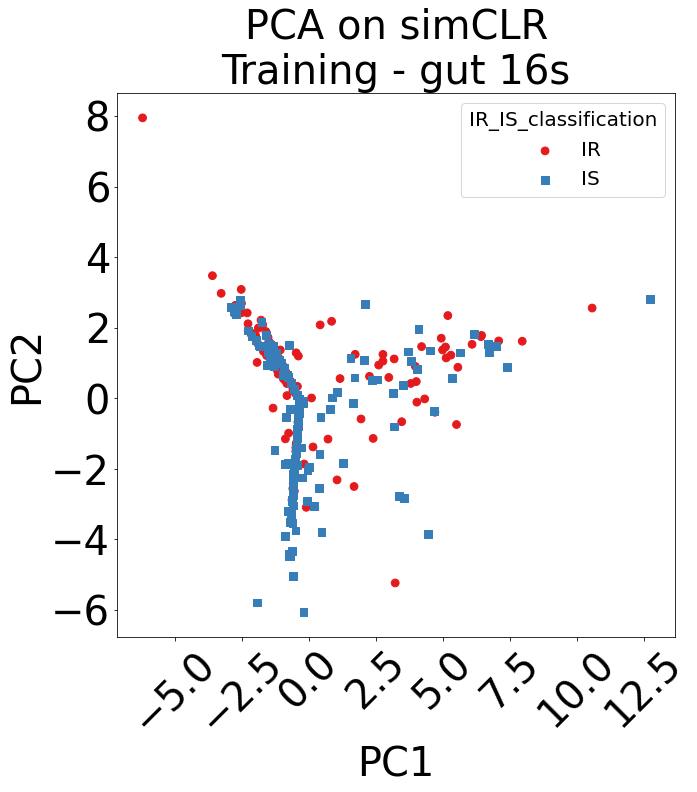

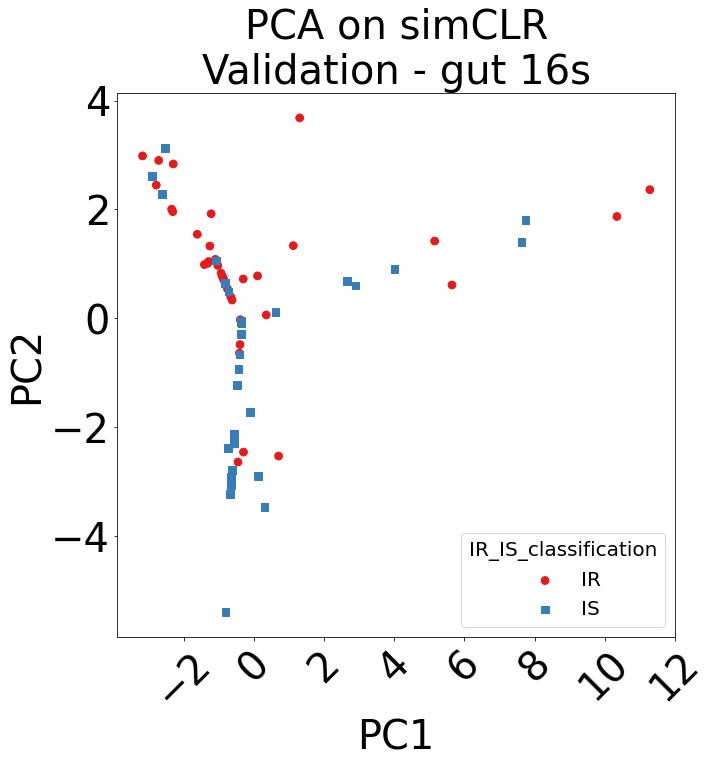

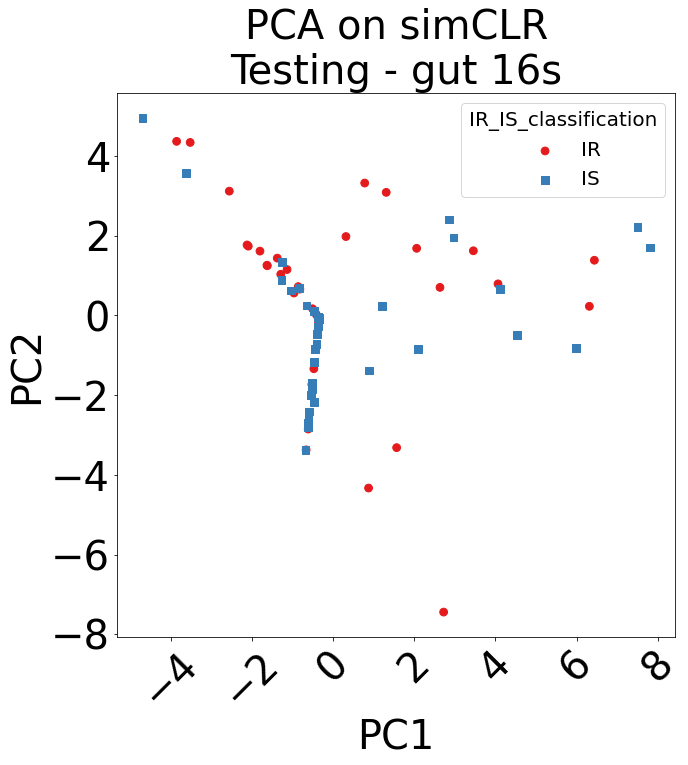

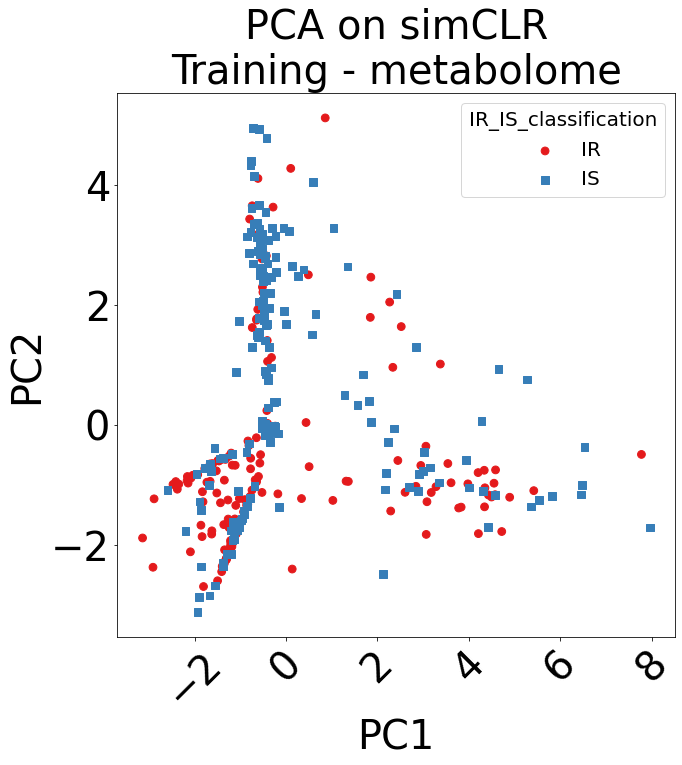

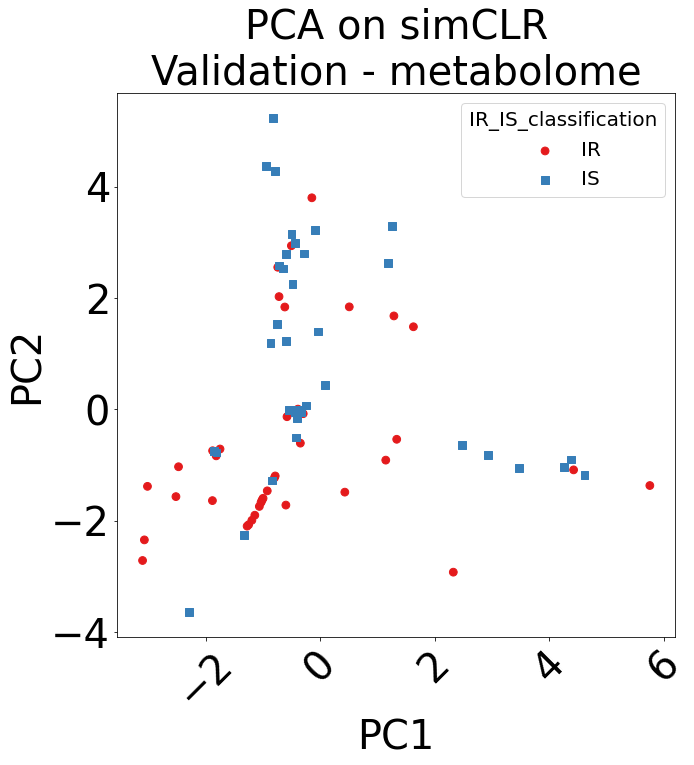

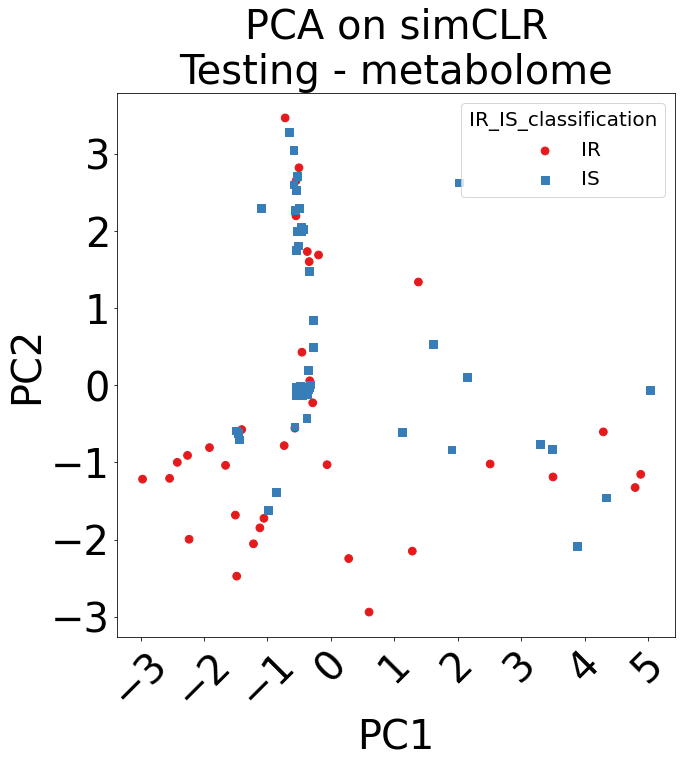

In [4]:
pca_feat_g_iris, pca_feat_g_trans_iris, pca_feat_m_iris, pca_feat_m_trans_iris =\
    pca_scatter_plot_embedding_unsup('IR_IS_classification', model_name='simCLR')

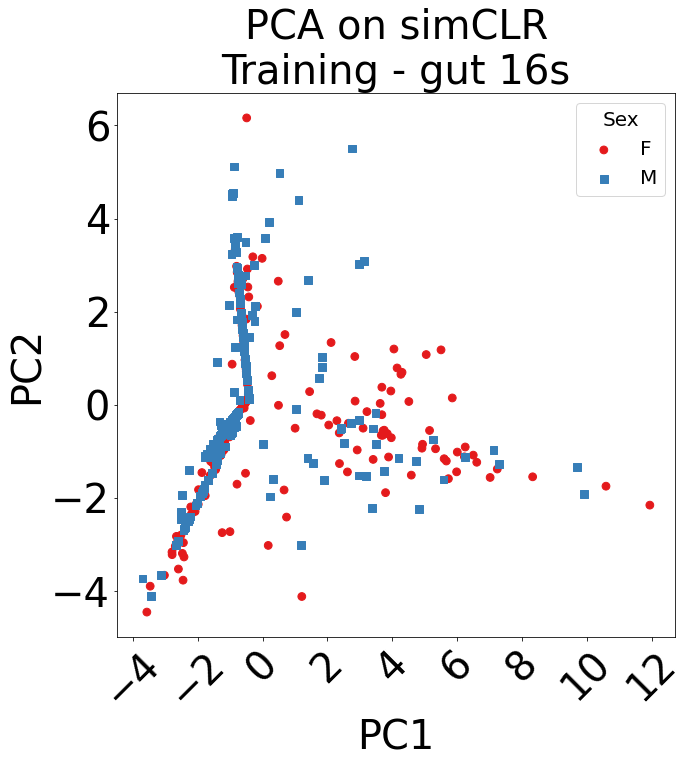

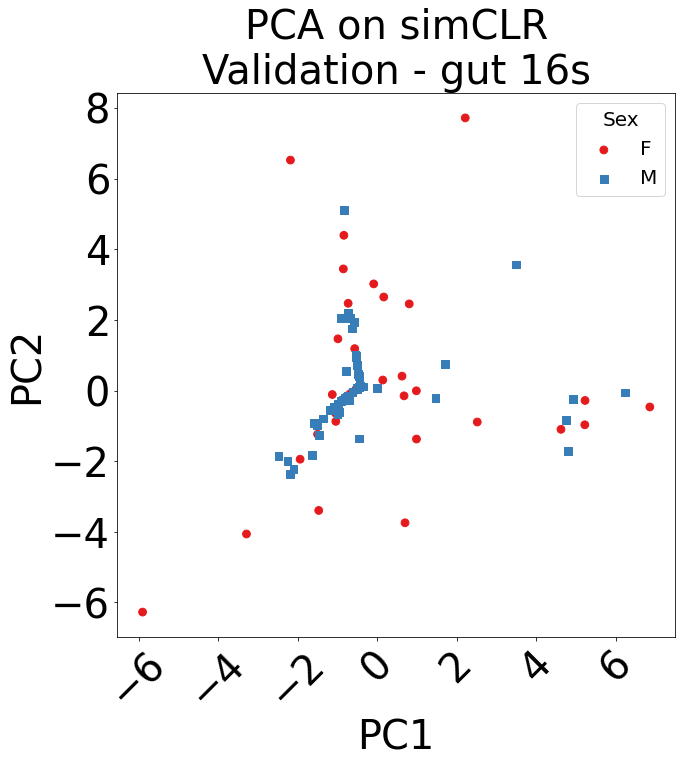

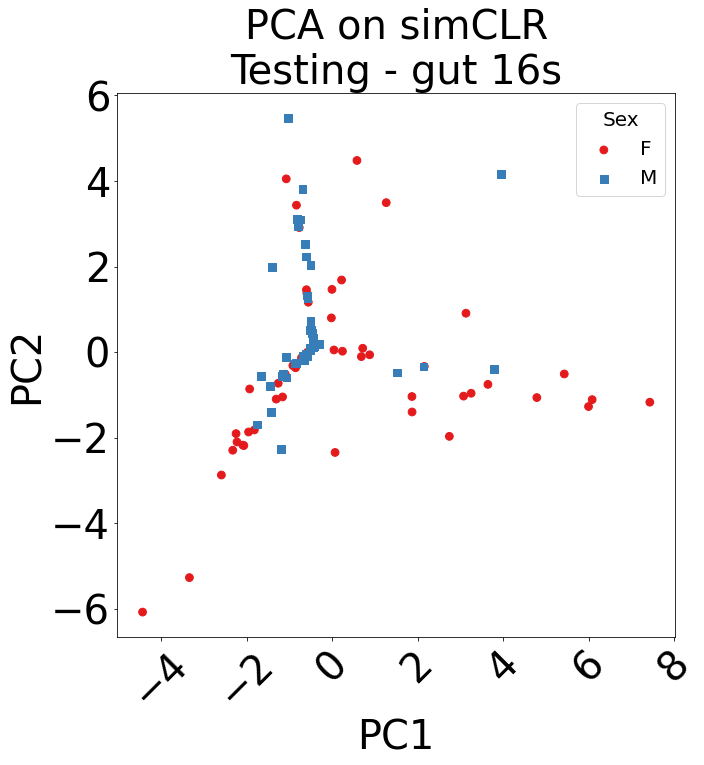

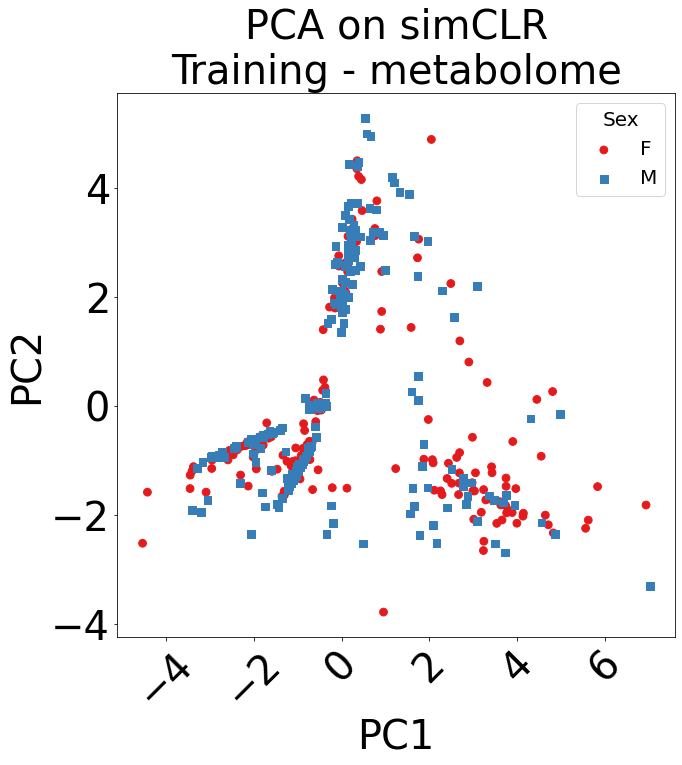

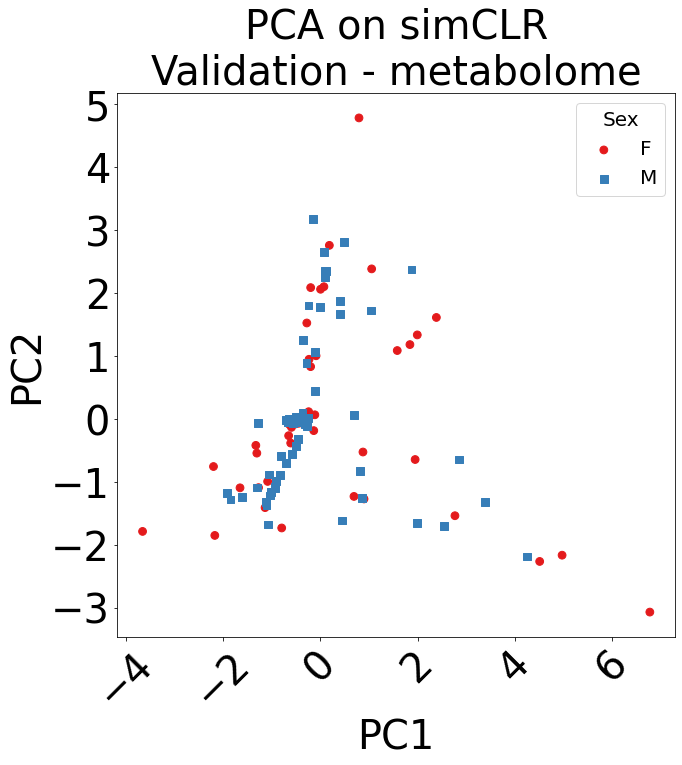

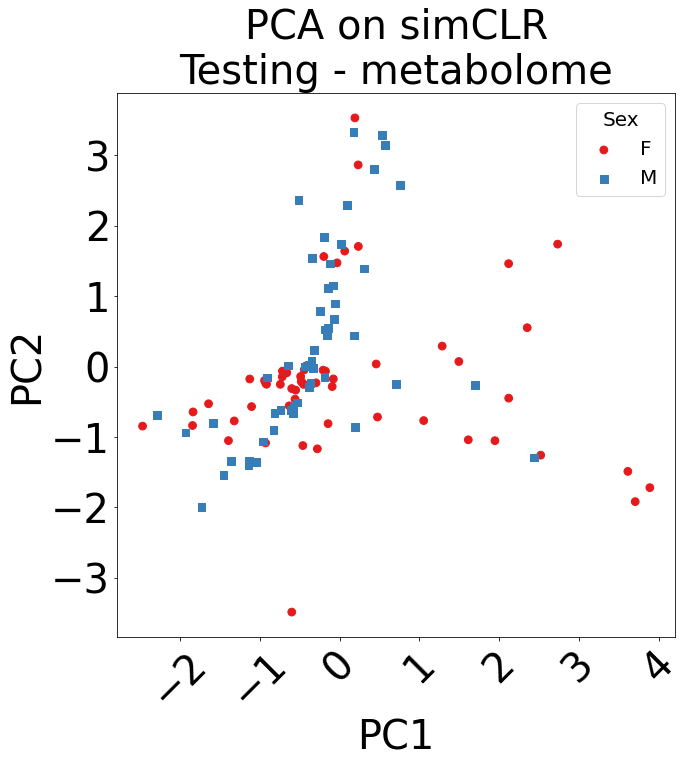

In [5]:
pca_feat_g_sex, pca_feat_g_trans_sex, pca_feat_m_sex, pca_feat_m_trans_sex =\
    pca_scatter_plot_embedding_unsup('Sex', model_name='simCLR')

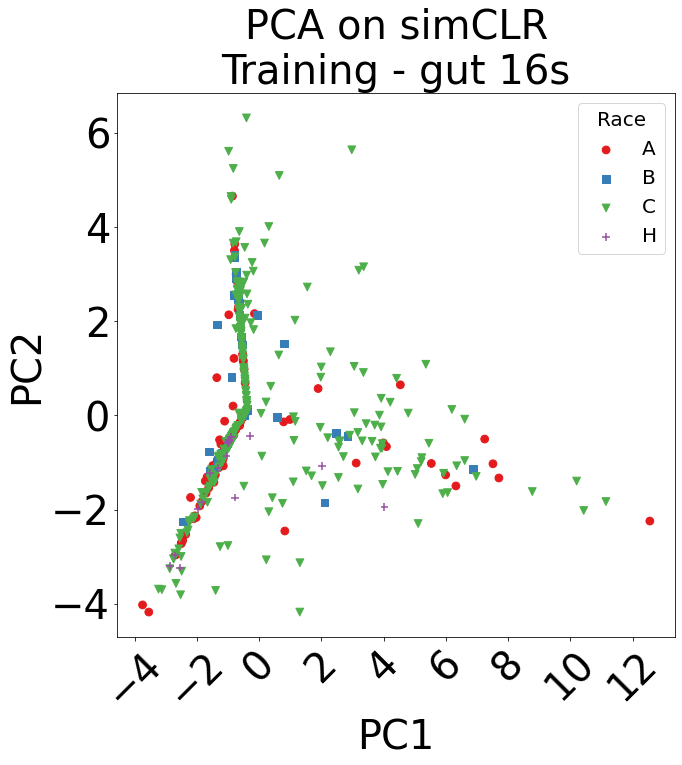

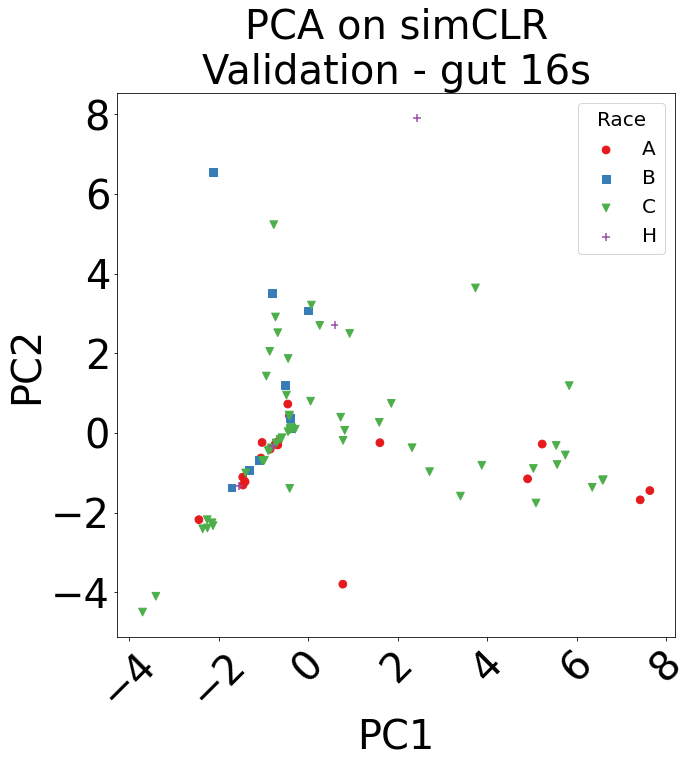

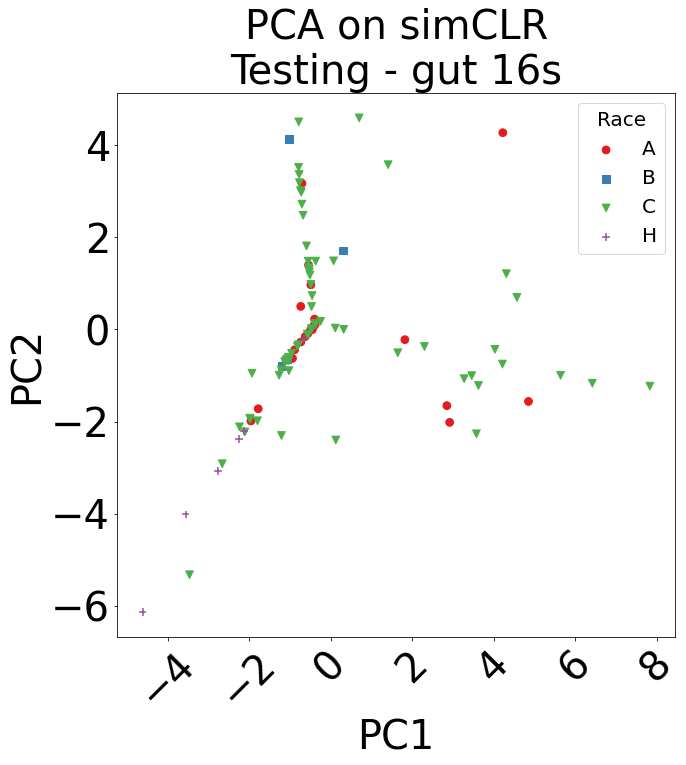

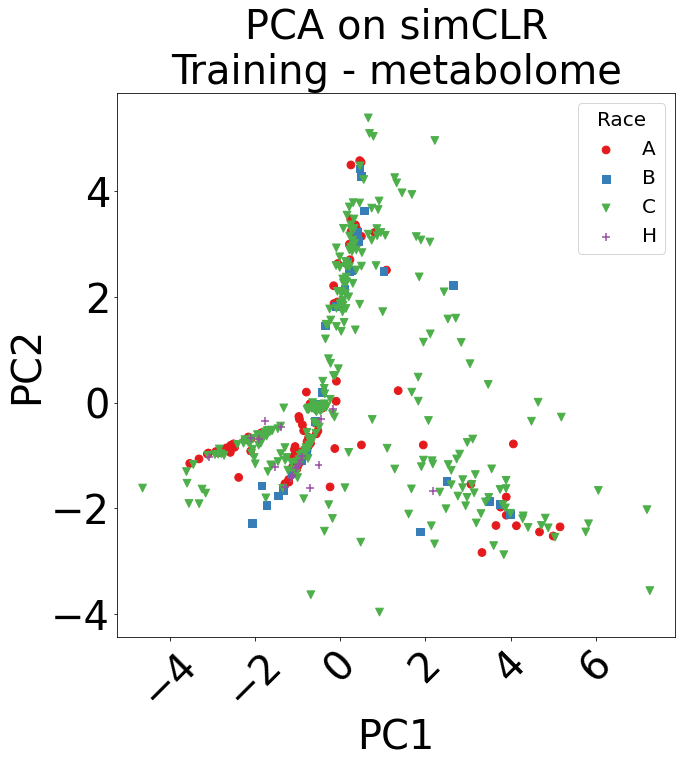

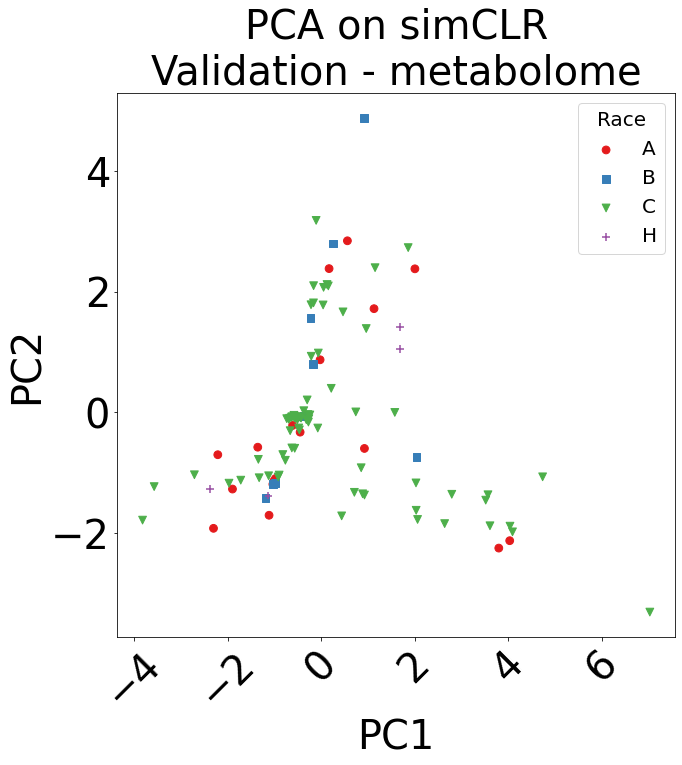

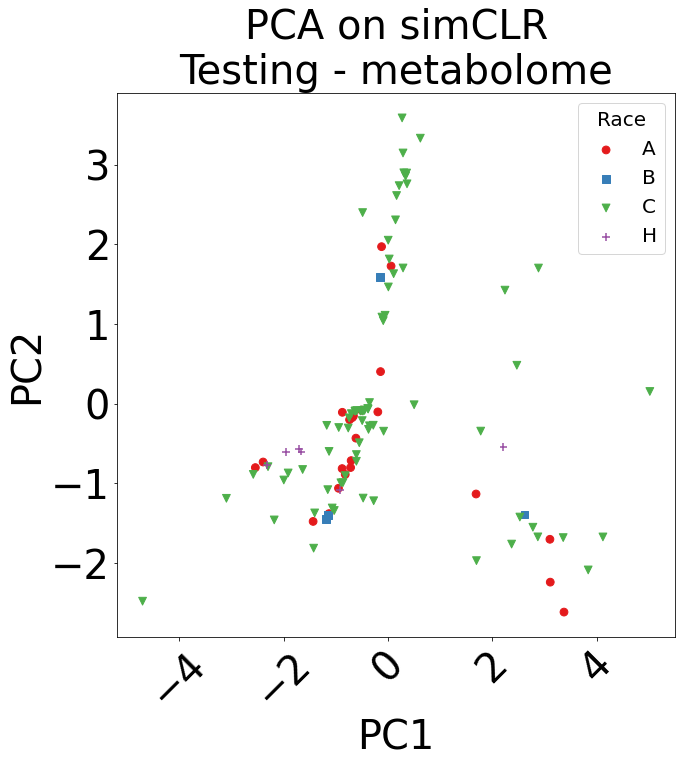

In [6]:
pca_feat_g_race, pca_feat_g_trans_race, pca_feat_m_race, pca_feat_m_trans_race =\
    pca_scatter_plot_embedding_unsup('Race', model_name='simCLR')